In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.1 MB/s eta 0:00:0000:0100:01


In [4]:
# Chargement de toutes les données
file_path = "data/database-imputed ESG.xlsx"
all_data = pd.read_excel(file_path)

In [8]:
# Variables disponibles
variables = ["market_cap", "employees", "revenue", "scope_1", "scope_2", "scope_3",
                         "waste_production", "waste_recycling", "water_consumption",
                         "water_withdrawal", "energy_consumption", "hours_of_training",
                         "gender_pay_gap", "independent_board_members_percentage",
                         "legal_costs_paid_for_controversies", "ceo_compensation"]

variables_env = ["scope_1", "scope_2", "scope_3",
                "waste_production", "waste_recycling", "water_consumption",
                "water_withdrawal", "energy_consumption"]

variables_eg = ["hours_of_training","gender_pay_gap", "independent_board_members_percentage",
                "legal_costs_paid_for_controversies", "ceo_compensation"]

# Années 
annees = ["2018", "2019", "2020"]

# Regions 
regions = ["Africa / Middle East", "Asia / Pacific", "Europe", 
           "Latin America and Caribbean", "United States and Canada"]

# Secteurs 
secteurs = all_data['primary_industry'].unique()

In [24]:
max = 0
max_var = ["", "", "", "", ""]

all_r2 = []

count = 0

#for x in variables_env, y in variables_eg, a in annees, r in regions, s in secteurs :
for x in variables_env :
    for y in variables_eg :
        for a in annees :
            for r in regions :
                for s in secteurs :
                    count+= 1
                    data = pd.DataFrame(all_data[(all_data["year"] == int(a)) & (all_data["primary_industry"] == s) & (all_data["region"] == r)])
                    if data[x].size > 5 and data[y].size > 5 :
                        slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
                        r_squared = r_value ** 2
                        if r_squared > max :
                            max_var = [x, y, a, r, s]
                            max = r_squared
                        all_r2.append(r_squared)

print(max_var, max)
print(np.mean(all_r2), np.var(all_r2))

print(count)

print(all_r2)

['scope_3', 'legal_costs_paid_for_controversies', '2020', 'Europe', 'Property and Casualty Insurance'] 0.9999945227806528
0.23792580088121051 0.0859056622271769
92400
[0.3631432329842703, 0.02337309820755058, 0.020615433836708597, 0.01602487384588628, 0.2108623420248325, 0.7857640426003639, 0.1375655578887415, 0.0008366775383856645, 0.853627898403054, 0.8780507505168617, 0.23756341207852663, 0.5640757953939507, 0.4159407924204694, 0.1363386492440813, 0.32403987671702883, 0.44893743459832625, 0.9454749659089882, 0.8603418847330525, 0.5888488666236446, 0.7361401330724155, 0.5349343103798915, 0.8279797772317635, 0.04745087358373265, 0.4033926461133719, 0.039386997033997485, 0.4654055047322476, 0.06971990834272003, 0.8241364628980841, 0.21375135411096002, 0.9580362977074189, 0.03535357329992085, 0.3776254241595411, 0.0956292376554466, 0.03502304805313174, 0.19226479386352066, 0.5222853048330398, 0.1311591300968781, 0.290124458651183, 0.23982548468570422, 0.4436096723955613, 0.0439705259145

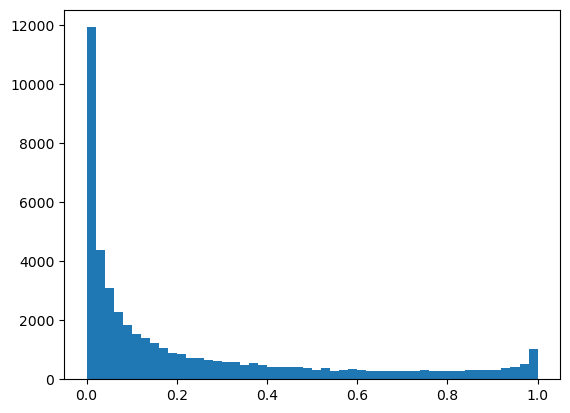

In [26]:
plt.hist(all_r2, bins = 50)
plt.show()